# Redes Neuronales Autoencoders

Redes Neuronales Autoencoders. Este tipo de red neuronal se utiliza comúnmente para aprender codificaciones de datos de entrada eficientes en un proceso no supervisado. Las aplicaciones típicas de los autoencoders incluyen la reducción de dimensionalidad, la denoising de imágenes y la generación de imágenes.

In [1]:
# Importamos las librerias

import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Dense

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [2]:
# Cargamos los datos de MNIST

(x_train, _), (x_test, _) = mnist.load_data() # no necesitamos las etiquetas para este ejercicio ya que es no supervisado.

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
# Normalizamos los datos

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [4]:
# Redimensionamos los datos

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:]))) # 60000 filas y 784 columnas
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:]))) # 10000 filas y 784 columnas

In [5]:
# Construimos el modelo de autoencoder

# Definimos la arquitectura del modelo
encoding_dim = 32

input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu', name='bottleneck')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

# Creamos el autoencoder
autoencoder = Model(inputs=input_img, outputs=decoded)

# Compilamos el modelo
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Entrenamos el modelo
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 3s 10ms/step - loss: 0.2789 - val_loss: 0.1920
Epoch 2/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1721 - val_loss: 0.1529
Epoch 3/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1430 - val_loss: 0.1320
Epoch 4/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1271 - val_loss: 0.1198
Epoch 5/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1169 - val_loss: 0.1115
Epoch 6/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1098 - val_loss: 0.1057
Epoch 7/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1048 - val_loss: 0.1017
Epoch 8/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1013 - val_loss: 0.0986
Epoch 9/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0989 - val_loss: 0.0967
Epoch 10/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0972 - val_loss: 0.095

Esto construirá un simple autoencoder donde la imagen de entrada se comprime a una representación de 32 dimensiones y luego se reconstruye de nuevo a una imagen de 784 dimensiones.

### Definir los modelos del encoder y decoder por separado

Definir los modelos del encoder y decoder por separado nos permitirá utilizarlos individualmente una vez que hayamos entrenado nuestro autoencoder. Esto puede ser útil, por ejemplo, para visualizar la representación comprimida de nuestras imágenes o para generar nuevas imágenes a partir de representaciones comprimidas.

In [6]:
# Este modelo mapea una entrada a su representación comprimida
encoder = Model(input_img, encoded)

# Creamos un placeholder para la entrada codificada (de tamaño 32)
encoded_input = Input(shape=(encoding_dim,))

# Recuperamos la última capa de nuestro modelo autoencoder
decoder_layer = autoencoder.layers[-1]

# Creamos el modelo del decoder
decoder = Model(encoded_input, decoder_layer(encoded_input))

### Entrenar el autoencoder

Para entrenar nuestro autoencoder, simplemente necesitamos llamar a la función fit del modelo, igual que haríamos con cualquier otro modelo de Keras. Sin embargo, hay una peculiaridad cuando entrenamos un autoencoder: utilizamos las mismas imágenes como entrada y como objetivo (o "etiqueta"). Esto se debe a que un autoencoder intenta aprender a reconstruir sus entradas lo mejor posible.

In [7]:
# Entrenar el autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 3s 9ms/step - loss: 0.0926 - val_loss: 0.0914
Epoch 2/50
235/235 [==============================] - 2s 9ms/step - loss: 0.0926 - val_loss: 0.0914
Epoch 3/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0926 - val_loss: 0.0914
Epoch 4/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0926 - val_loss: 0.0915
Epoch 5/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0926 - val_loss: 0.0915
Epoch 6/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0925 - val_loss: 0.0914
Epoch 7/50
235/235 [==============================] - 2s 9ms/step - loss: 0.0926 - val_loss: 0.0914
Epoch 8/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0926 - val_loss: 0.0915
Epoch 9/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0925 - val_loss: 0.0914
Epoch 10/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0925 - val_loss: 0.0914

Estamos utilizando el optimizador Adam y la pérdida de la entropía cruzada binaria como nuestra función de pérdida. La entropía cruzada binaria es una buena opción en este caso porque estamos trabajando con imágenes en escala de grises, que pueden considerarse como valores de probabilidad (entre 0 y 1).

In [8]:
# Codificamos y decodificamos algunos dígitos de prueba

encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 0s 1ms/step


1/1 [==============================] - 0s 52ms/step


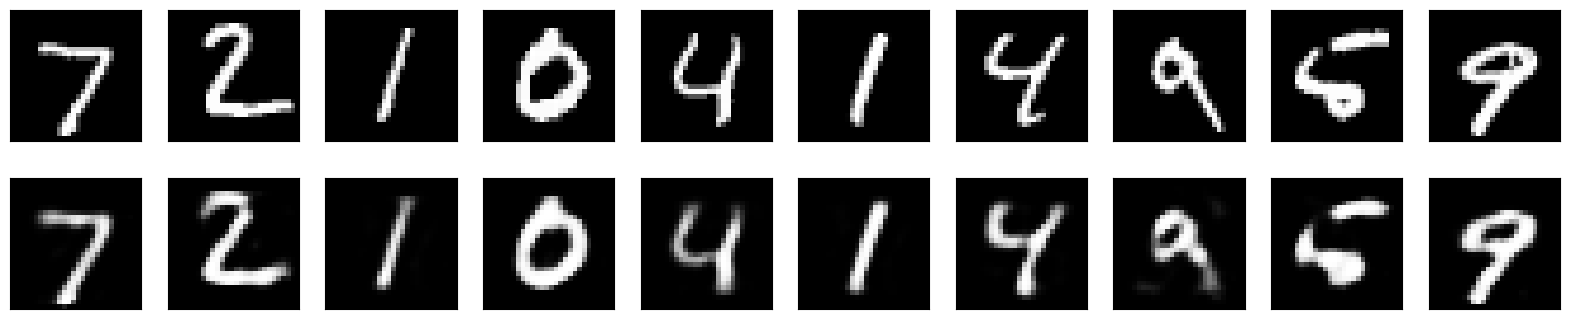

In [9]:
# Visualizamos la reconstrucción del autoencoder

def plot_reconstructions(model, images, n_images=10):
    reconstructions = model.predict(images[:n_images])

    fig = plt.figure(figsize=(n_images * 2, 4))

    for i in range(n_images):
        # display original
        ax = plt.subplot(2, n_images, i + 1)
        plt.imshow(images[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display reconstruction
        ax = plt.subplot(2, n_images, i + 1 + n_images)
        plt.imshow(reconstructions[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

# Visualize the reconstructed images
plot_reconstructions(autoencoder, x_test)

### Uso de la representación codificada

La capa intermedia del autoencoder (la capa de "cuello de botella") contiene una representación codificada de la imagen de entrada. Esta representación codificada es una versión comprimida de la imagen de entrada, y puede ser útil para varias tareas.

Para extraer la representación codificada, podemos crear un nuevo modelo que tenga la misma arquitectura que el autoencoder hasta la capa de cuello de botella.

In [10]:
encoder = Model(inputs=autoencoder.input, outputs=autoencoder.get_layer('bottleneck').output)
encoded_imgs = encoder.predict(x_test)

print('Shape of encoded images:', encoded_imgs.shape)

313/313 [==============================] - 0s 1ms/step
Shape of encoded images: (10000, 32)


Ahora que hemos obtenido las representaciones codificadas de nuestras imágenes de prueba, podemos utilizar estos vectores codificados para cualquier propósito que deseemos. Por ejemplo, podríamos usarlos como entrada para otro modelo de aprendizaje automático, usarlos para visualizar los datos en un espacio de menor dimensión, o usarlos para encontrar imágenes similares en nuestro conjunto de datos.

El último paso en este proceso es examinar cómo nuestro autoencoder ha reconstruido las imágenes de entrada. Para hacer esto, podemos generar imágenes decodificadas a partir de nuestras imágenes codificadas y luego compararlas con las imágenes de entrada originales.

313/313 [==============================] - 0s 1ms/step


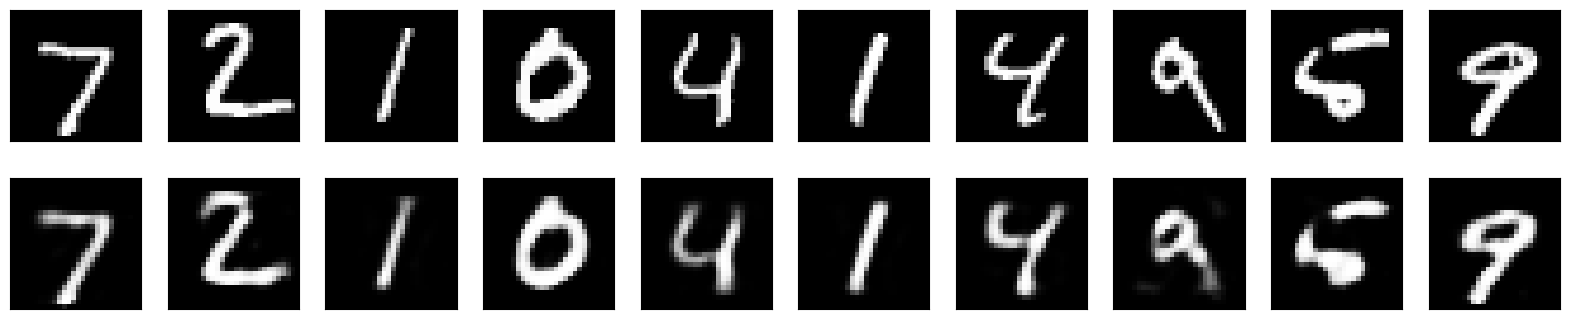

In [11]:
# Generamos las imágenes decodificadas
decoded_imgs = autoencoder.predict(x_test)

# Comparamos las imágenes originales con las reconstruidas
n = 10  # Número de imágenes que queremos mostrar
plt.figure(figsize=(20, 4))
for i in range(n):
    # Imágenes originales
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Imágenes reconstruidas
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()